In [1]:
import numpy as np

import sys
sys.path.append('../../..')
from utils.tools import get_metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
loss = np.zeros((12,10))
loss_avg = np.zeros((4,10))
loss_err = np.zeros((4,10))

acc = np.zeros((12, 10))
acc_avg = np.zeros((4,10))
acc_err = np.zeros((4,10))

wd = np.zeros(4)

# train_10_wd_1e-3_1.log
i = 0
j = 0

for wd_power in ['6', '5', '4', '3']:
    for no in ['1', '2', '3']:
        if i == 0:
        # we need this because the first file has 15 instead of 10 epochs
            log_file = '../train_15_wd_1e-6_1.log'
            conf, train_dict, eval_dict = get_metrics(log_file)
            loss[i,:] = np.array(eval_dict['Loss'])[:10]
            acc[i,:] = np.array(eval_dict['Acc'])[:10]
        else:
            log_file = '../train_10_wd_1e-{}_{}.log'.format(wd_power, no)
            conf, train_dict, eval_dict = get_metrics(log_file)
            loss[i,:] = np.array(eval_dict['Loss'])
            acc[i,:] = np.array(eval_dict['Acc'])
        i += 1

        
    loss_avg[j,:] = np.mean(loss[i-3:i,:], axis=0)
    loss_err[j,:] = np.std(loss[i-3:i,:], axis=0)
    wd[j] = float('1e-{}'.format(wd_power))
    acc_avg[j,:] = np.mean(acc[i-3:i,:], axis=0)
    acc_err[j,:] = np.std(acc[i-3:i,:], axis=0)
    
    j += 1
        
    

In [3]:
epochs = np.arange(10)+1 # 1,2,..,10

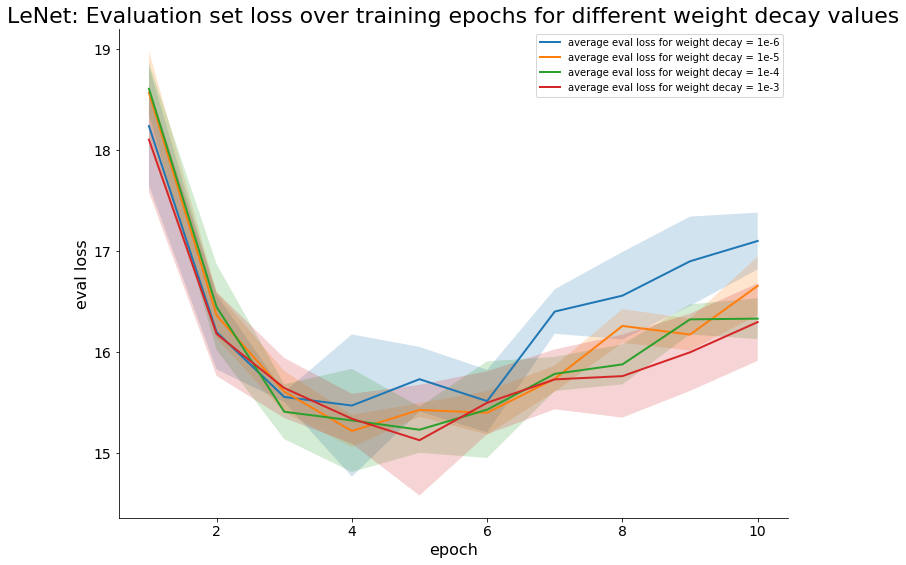

In [4]:
plt.figure(figsize=(12, 9))
 
ax = plt.subplot(111)

# Remove frame lines of the plot
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
 
# show the axis ticks only on the bottom and on the left of the axis
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

# make the axis big enough
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
 
plt.ylabel("eval loss", fontsize=16)
plt.xlabel("epoch", fontsize=16)

 
# plt error bars
plt.fill_between(epochs, loss_avg[0,:] - loss_err[0,:],
                loss_avg[0,:] + loss_err[0,:], alpha=0.2)
 
plt.plot(epochs, loss_avg[0,:], lw=2, label="average eval loss for weight decay = 1e-6")

plt.fill_between(epochs, loss_avg[1,:] - loss_err[1,:],
                loss_avg[1,:] + loss_err[1,:],alpha=0.2)
 
plt.plot(epochs, loss_avg[1,:], lw=2, label="average eval loss for weight decay = 1e-5")

plt.fill_between(epochs, loss_avg[2,:] - loss_err[2,:],
                loss_avg[2,:] + loss_err[2,:], alpha=0.2)
 
plt.plot(epochs, loss_avg[2,:], lw=2, label="average eval loss for weight decay = 1e-4")

plt.fill_between(epochs, loss_avg[3,:] - loss_err[3,:],
                loss_avg[3,:] + loss_err[3,:], alpha=0.2)
 
plt.plot(epochs, loss_avg[3,:], lw=2, label="average eval loss for weight decay = 1e-3")



plt.legend(loc='best')
 
plt.title("LeNet: Evaluation set loss over training epochs for different weight decay values", fontsize=22)
 
plt.savefig("lenet_eval_loss_wd", bbox_inches="tight")

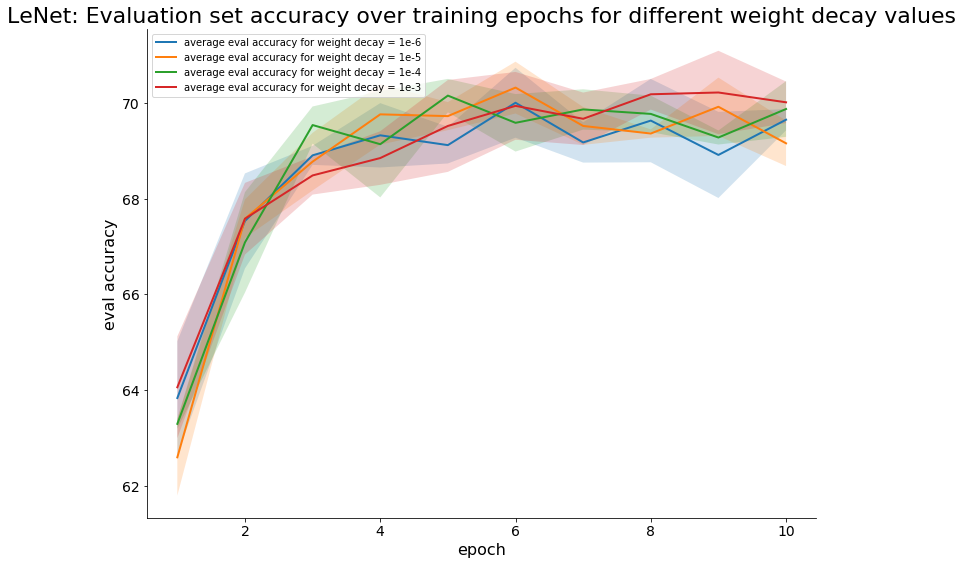

In [5]:
plt.figure(figsize=(12, 9))
 
ax = plt.subplot(111)

# Remove frame lines of the plot
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
 
# show the axis ticks only on the bottom and on the left of the axis
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

# make the axis big enough
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
 
plt.ylabel("eval accuracy", fontsize=16)
plt.xlabel("epoch", fontsize=16)

 
# plt error bars
plt.fill_between(epochs, acc_avg[0,:] - acc_err[0,:],
                acc_avg[0,:] + acc_err[0,:], alpha=0.2)
 
plt.plot(epochs, acc_avg[0,:], lw=2, label="average eval accuracy for weight decay = 1e-6")

plt.fill_between(epochs, acc_avg[1,:] - acc_err[1,:],
                acc_avg[1,:] + acc_err[1,:],alpha=0.2)
 
plt.plot(epochs, acc_avg[1,:], lw=2, label="average eval accuracy for weight decay = 1e-5")

plt.fill_between(epochs, acc_avg[2,:] - acc_err[2,:],
                acc_avg[2,:] + acc_err[2,:], alpha=0.2)
 
plt.plot(epochs, acc_avg[2,:], lw=2, label="average eval accuracy for weight decay = 1e-4")

plt.fill_between(epochs, acc_avg[3,:] - acc_err[3,:],
                acc_avg[3,:] + acc_err[3,:], alpha=0.2)
 
plt.plot(epochs, acc_avg[3,:], lw=2, label="average eval accuracy for weight decay = 1e-3")



plt.legend(loc='best')
 
plt.title("LeNet: Evaluation set accuracy over training epochs for different weight decay values", fontsize=22)
 
plt.savefig("lenet_eval_acc_wd", bbox_inches="tight")